In [1]:
import sys
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SRAVAN\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

1.14.0
2.2.4


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [3]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

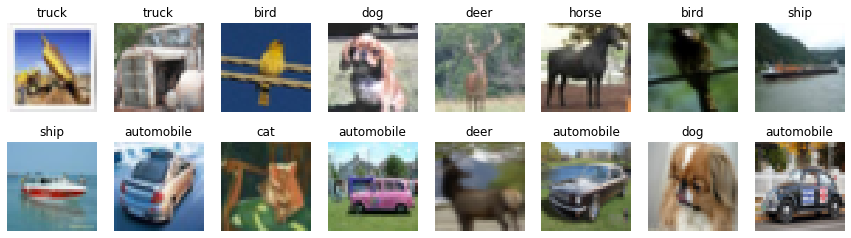

In [4]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
        ax.grid('off')
        ax.axis('off')

In [5]:
x_train2 = x_train / 255.0 - 0.5
x_test2 = x_test / 255.0 - 0.5

In [6]:
from keras.utils import to_categorical
y_train2 = to_categorical(y_train, 10)
y_test2 = to_categorical(y_test, 10)

In [7]:
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, InputLayer

In [8]:
# conv - conv - pool
def make_model():
    model = Sequential()
    model.add(InputLayer([32, 32, 3]))
    
    model.add(Conv2D(16, [3, 3], padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, [3, 3], padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D([2, 2]))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, [3, 3], padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, [3, 3], padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D([2, 2]))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, ))
    model.add(Dropout(0.5))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, ))
    model.add(Activation('softmax'))
    
    return model

In [9]:
model = make_model()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
______________________

In [10]:
from keras.optimizers import adamax
INIT_LR = 5e-3
BATCH_SIZE = 32
EPOCHS = 14

model = make_model()
model.compile(loss='categorical_crossentropy', optimizer = adamax(lr = INIT_LR), metrics = ['accuracy'])

def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [12]:
model.fit(x_train2, y_train2,
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), LrHistory()],
         validation_data=(x_test2, y_test2), shuffle=True, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/14
Learning rate: 0.005
50000/50000 [==============================] - 90s 2ms/step - loss: 0.4965 - acc: 0.8254 - val_loss: 0.6138 - val_acc: 0.7976
Epoch 2/14
Learning rate: 0.0045
50000/50000 [==============================] - 105s 2ms/step - loss: 0.4713 - acc: 0.8363 - val_loss: 0.6049 - val_acc: 0.7999
Epoch 3/14
Learning rate: 0.00405
50000/50000 [==============================] - 106s 2ms/step - loss: 0.4472 - acc: 0.8424 - val_loss: 0.6200 - val_acc: 0.8067
Epoch 4/14
Learning rate: 0.003645
50000/50000 [==============================] - 109s 2ms/step - loss: 0.4258 - acc: 0.8521 - val_loss: 0.6097 - val_acc: 0.8076
Epoch 5/14
Learning rate: 0.0032805
50000/50000 [==============================] - 110s 2ms/step - loss: 0.4004 - acc: 0.8610 - val_loss: 0.6333 - val_acc: 0.8087
Epoch 6/14
Learning rate: 0.00295245
50000/50000 [==============================] - 126s 3ms/step - loss: 0.3787 - acc: 0.8675 - val_loss: 0.6050 

In [13]:
model.save_weights('weights.h5')

In [23]:
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [27]:
confusion_matrix(y_test, y_pred_test_classes)

array([[829,  14,  29,  16,  12,   2,   7,   8,  53,  30],
       [  7, 904,   3,   3,   1,   1,   5,   0,  16,  60],
       [ 53,   1, 699,  45,  56,  50,  57,  19,  15,   5],
       [ 15,   5,  47, 661,  45, 130,  57,  19,  12,   9],
       [ 11,   3,  48,  58, 774,  19,  46,  30,   9,   2],
       [  8,   5,  37, 119,  30, 760,  10,  22,   4,   5],
       [  4,   1,  21,  36,  17,  10, 902,   2,   5,   2],
       [  9,   1,  21,  32,  39,  38,   3, 847,   2,   8],
       [ 31,   9,   5,   6,   2,   2,   7,   3, 923,  12],
       [ 13,  40,   2,   6,   4,   3,   4,   6,  18, 904]], dtype=int64)

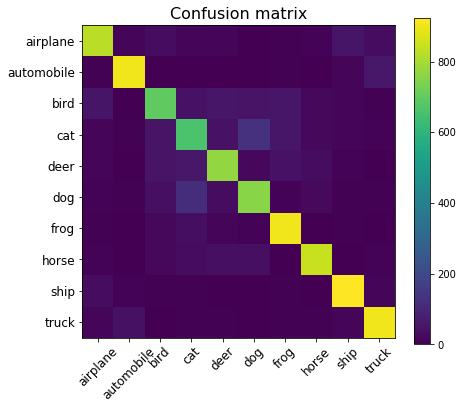

Test accuracy: 0.8203


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

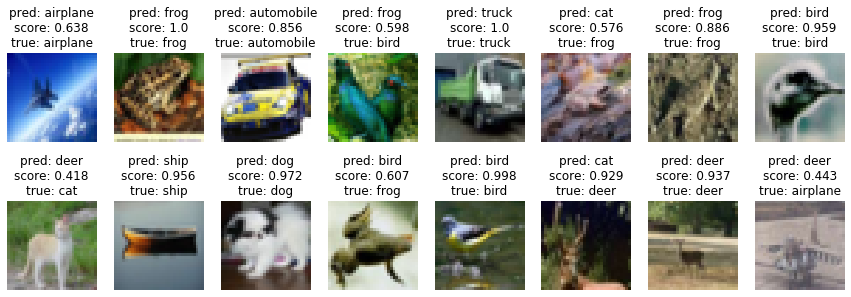

In [30]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()